In [1]:
#pip install nsepy matplotlib

In [44]:
from nsepy import get_index_pe_history
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
import math
import time
import numpy as np

In [3]:
symbol_list = ["NIFTY","NIFTY IT","NIFTY BANK","NIFTY FMCG"]
start_date = date(2004,1,1)
end_date = date.today()

In [4]:
output = pd.DataFrame()


In [5]:
def pe_data():  
    for i in symbol_list:
        data = get_index_pe_history(symbol =  i ,
                                start= start_date,
                                end= end_date)
        data['Index'] = i
        global output
        output = output.append(data)
    return(output)

In [6]:
start_time = time.time()

while output.shape[0] == 0:
    pe_data()
    #print('No Result Yet')
    if output.shape[0] != 0:
        current_time = time.time()
        elapsed_time = current_time - start_time
        print('Sucsess' + ' ' + str(elapsed_time) + 'seconds')
        break

Sucsess 8.607472658157349


In [7]:
(output['Index'].unique())

array(['NIFTY', 'NIFTY IT', 'NIFTY BANK', 'NIFTY FMCG'], dtype=object)

In [46]:
output['Mean P/E'] = np.round(output.groupby('Index')['P/E'].transform(lambda x: x.rolling(252, 1).mean()),2)
output['Mean P/B'] = np.round(output.groupby('Index')['P/B'].transform(lambda x: x.rolling(252, 1).mean()),2)



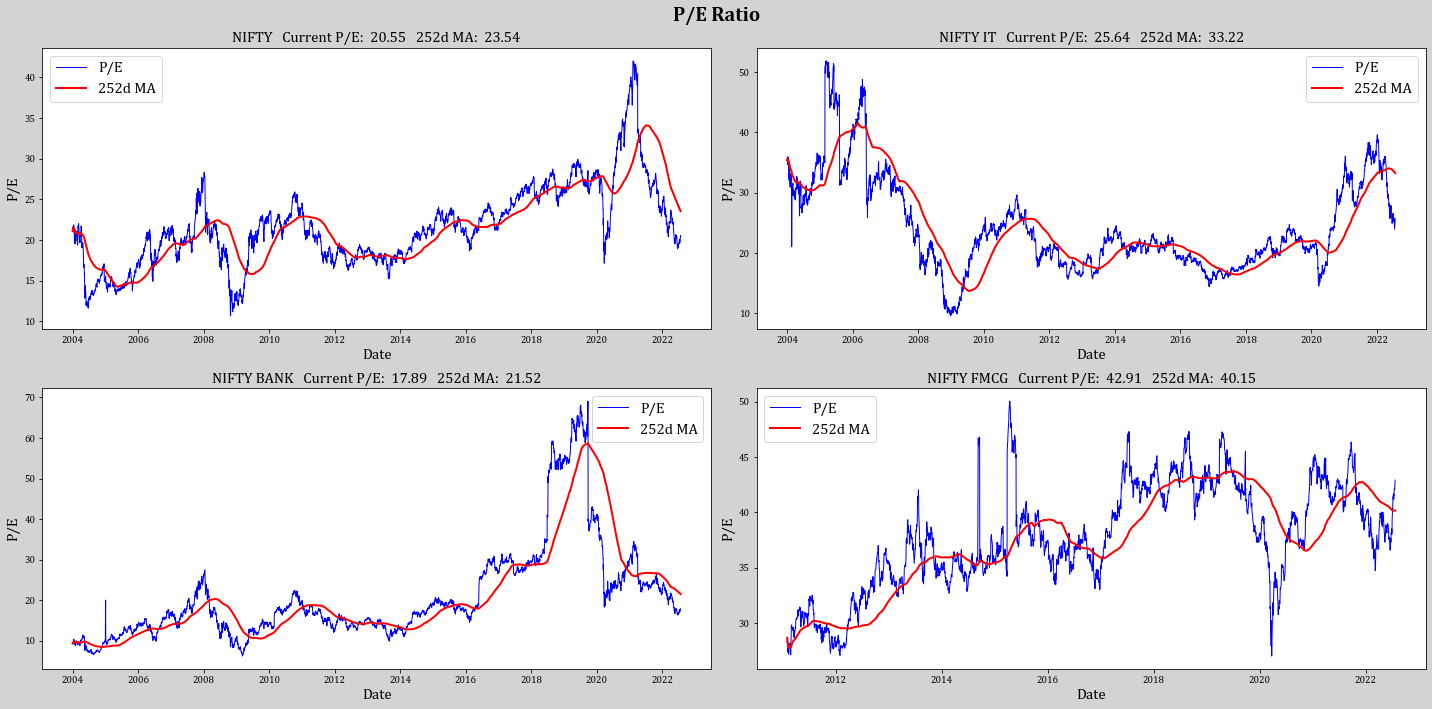

In [48]:
fig, axs = plt.subplots(nrows= math.ceil(len(symbol_list)/2), ncols=2,figsize = (20,10) ,facecolor= 'lightgray')
plt.subplots_adjust(hspace=0.4,wspace=0.4)
plt.rcParams["font.family"] = "Cambria"
fig.suptitle("P/E Ratio", fontsize=20 , color = 'black' , weight = 'bold')


ax = axs.ravel()

for symbol, i in zip(symbol_list, range(0,len(symbol_list))):
    y1 = output[output["Index"] == symbol]['P/E']
    y2 = output[output["Index"] == symbol]['Mean P/E']
    latest_value = output[output["Index"] == symbol]['P/E'].iloc[-1]
    latest_value_mean = output[output["Index"] == symbol]['Mean P/E'].iloc[-1]
    ax[i].plot(y1,color = 'blue' , linewidth = 1)
    ax[i].plot(y2,color = 'red' , linewidth = 2)
    ax[i].set_title(symbol + '   Current P/E:  ' + str(latest_value) +'   252d MA:  ' + str(latest_value_mean), fontsize = 15)
    ax[i].set_xlabel('Date', fontsize = 15)
    ax[i].set_ylabel('P/E', fontsize = 15)
    ax[i].legend(['P/E','252d MA'] , fontsize = 15)
    
fig.tight_layout()